In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

Using TensorFlow backend.


Load the data

In [2]:
with open('mnist.pkl', 'rb') as f:
    images = pickle.load(f)['images']

Rescale the images to have values between 0 and 1.

In [3]:
images = images / 255.

We do need to reshape the images to add a single depth channel for use with convolutional stages.  Reshape the images to have a shape of 28 x 28 x 1.

In [4]:
images = images.reshape((-1, 28, 28, 1))

Define an input layer.  We will use the same shape input as an image.

In [5]:
input_layer = Input(shape=(28, 28, 1,))

Add a convolutional stage, with 16 layers or filters, a 3 x 3 weight matrix, a ReLU activation function and using **same** padding which means the output has the same length as the input image.

In [6]:
hidden_encoding = Conv2D(
    16, # Number of layers or filters in the weight matrix
    (3, 3), # Shape of the weight matrix
    activation='relu',
    padding='same', # How to apply the weights to the images
)(input_layer)

Instructions for updating:
Colocations handled automatically by placer.


Add a max pooling layer to the encoder with a 2 x 2 kernel.

In [7]:
encoded = MaxPooling2D((2, 2))(hidden_encoding)

Add a decoding convolutional layer

In [8]:
hidden_decoding = Conv2D(
    16, # Number of layers or filters in the weight matrix
    (3, 3), # Shape of the weight matrix
    activation='relu',
    padding='same', # How to apply the weights to the images
)(encoded)

Add an upsampling layer.

In [9]:
upsample_decoding = UpSampling2D((2, 2))(hidden_decoding)

Add the final convolutional stage, using 1 layer as per the initial image depth

In [10]:
decoded = Conv2D(
    1, # Number of layers or filters in the weight matrix
    (3, 3), # Shape of the weight matrix
    activation='sigmoid',
    padding='same', # How to apply the weights to the images
)(upsample_decoding)

Construct the model by passing the first and last layers of the network to the Model class.

In [11]:
autoencoder = Model(input_layer, decoded)

Display the structure of the model

In [12]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


Compile the autoencoder using a binary cross entropy loss function and adadelta gradient descent.

In [13]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta')

Now let's fit the model, again we pass the images as the training data and as the desired output.  Train for 20 epochs as convolutional networks take a lot longer to compute.

In [14]:
autoencoder.fit(images, images, epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
10000/10000 [==============================] - 7s 746us/step - loss: 0.1165
Epoch 2/20
10000/10000 [==============================] - 7s 724us/step - loss: 0.0706
Epoch 3/20
10000/10000 [==============================] - 8s 786us/step - loss: 0.0685
Epoch 4/20
10000/10000 [==============================] - 8s 776us/step - loss: 0.0675
Epoch 5/20
10000/10000 [==============================] - 7s 728us/step - loss: 0.0669
Epoch 6/20
10000/10000 [==============================] - 8s 830us/step - loss: 0.0663
Epoch 7/20
10000/10000 [==============================] - 9s 880us/step - loss: 0.0659
Epoch 8/20
10000/10000 [==============================] - 9s 939us/step - loss: 0.0656
Epoch 9/20
10000/10000 [==============================] - 9s 938us/step - loss: 0.0653
Epoch 10/20
10000/10000 [==============================] - 9s 876us/step - loss: 0.0651
Epoch 11/20
10000/10000 [==============================] - 9s 884us/step - loss: 

Calculate and store the output of the encoding stage for the first 5 samples.

In [15]:
encoder_output = Model(input_layer, encoded).predict(images[:5])

Reshape the encoder output for visualisation.

In [18]:
encoder_output = encoder_output.reshape((-1, 14 * 14, 16))

Get the output of the decoder for the 5 images

In [19]:
decoder_output = autoencoder.predict(images[:5])

Reshape the decoder output to be 28 x 28 in size

In [24]:
decoder_output = decoder_output.reshape((-1, 28, 28))

Reshape the original images back to be 28 x 28 in size.

In [25]:
images = images.reshape((-1, 28, 28))

Plot the original image, the mean encoder output and the decoder.

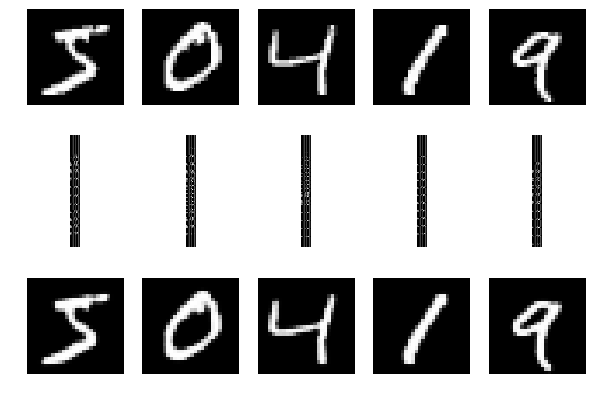

In [27]:
plt.figure(figsize=(10, 7))
for i in range(5):
    # Plot original digit images
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    
    # Plot the encoder output
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')   
    
    # Plot the decoder output
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i], cmap='gray')
    plt.axis('off')        